## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Matplotlib is building the font cache; this may take a moment.


## Importing Dataset

In [2]:
dataset = pd.read_csv('Bengaluru_House_Data.csv')
d1 = dataset.drop(['area_type','availability','society','balcony'],axis=1)
print(d1)

                       location       size total_sqft  bath   price
0      Electronic City Phase II      2 BHK       1056   2.0   39.07
1              Chikka Tirupathi  4 Bedroom       2600   5.0  120.00
2                   Uttarahalli      3 BHK       1440   2.0   62.00
3            Lingadheeranahalli      3 BHK       1521   3.0   95.00
4                      Kothanur      2 BHK       1200   2.0   51.00
...                         ...        ...        ...   ...     ...
13315                Whitefield  5 Bedroom       3453   4.0  231.00
13316             Richards Town      4 BHK       3600   5.0  400.00
13317     Raja Rajeshwari Nagar      2 BHK       1141   2.0   60.00
13318           Padmanabhanagar      4 BHK       4689   4.0  488.00
13319              Doddathoguru      1 BHK        550   1.0   17.00

[13320 rows x 5 columns]


## Checking NULL values

In [3]:
d1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [4]:
d2 = d1.dropna()
d2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [5]:
d2['bhk'] = d2['size'].apply(lambda x: int(x.split(' ')[0]))
d2.head()

/var/folders/6z/kh0vwfm15hj1cr5rhbv6d8zc0000gn/T/ipykernel_7417/1895018743.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2['bhk'] = d2['size'].apply(lambda x: int(x.split(' ')[0]))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


## Correcting Total Square Feet

In [6]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [7]:
d2[~d2['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [8]:
def convert_sqft_to_num(x):
    token=x.split('-')
    if(len(token)==2):
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [9]:
d3 = d2.copy()
d3.total_sqft = d3.total_sqft.apply(convert_sqft_to_num)
d3 = d3[d3.total_sqft.notnull()]
d3.head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [10]:
d3.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

## Adding anew Column "Price per Sqft"

In [11]:
d3['Price_per_sqft'] = d3['price']*100000/d3['total_sqft']
d3.head()

,location,size,total_sqft,bath,price,bhk,Price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [12]:
len(d3.location.unique())

1298

## Reducing the number of locations

In [13]:
d3.location = d3.location.apply(lambda x: x.strip())
location_stats = d3.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

## Dimensionality Reduction

In [14]:
locations_lessthan_10 = location_stats[location_stats<=10]
locations_lessthan_10

location
Sadashiva Nagar          10
Naganathapura            10
Basapura                 10
Nagadevanahalli          10
Kalkere                  10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kannur                    1
whitefiled                1
Name: location, Length: 1047, dtype: int64

In [15]:
len(d3.location.unique())

1287

In [16]:
d3.location = d3.location.apply(lambda x:'Other' if x in locations_lessthan_10 else x)
len(d3.location.unique())

241

In [17]:
d3.shape

(13200, 7)

## Removing Outliers using Business Logic

Removing suspicious outlier

In [18]:
d4 = d3[~(d3.total_sqft/d3.bhk<300 )]
d4.shape

(12456, 7)

In [19]:
d4.Price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: Price_per_sqft, dtype: float64

Removing Price per sqft outliers

In [20]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.Price_per_sqft)
        st = np.std(subdf.Price_per_sqft)
        reduced_df = subdf[(subdf.Price_per_sqft>(m-st)) & (subdf.Price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [21]:
d5 = remove_pps_outliers(d4)
d5.shape

(10242, 7)

Visualizing Data using Scatter Plot

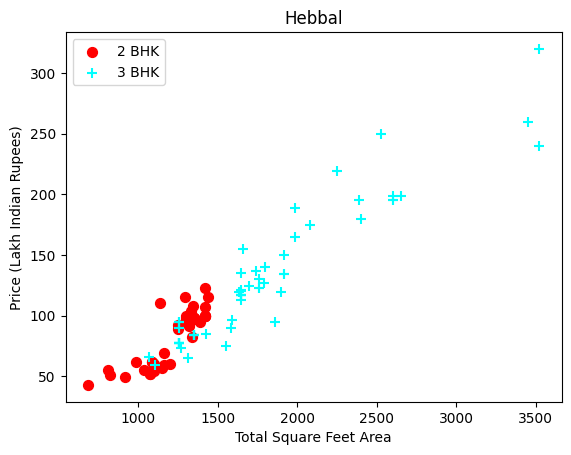

In [22]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.scatter(bhk2.total_sqft,bhk2.price,color='red',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='cyan',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

plot_scatter_chart(d5,"Hebbal")

Removing BHK Outlier

In [23]:
def remove_bhk_outliers(df):
    excluded = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.Price_per_sqft),
                'std': np.std(bhk_df.Price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                excluded = np.append(excluded, bhk_df[bhk_df.Price_per_sqft<(stats['mean'])].index.values)
    return df.drop(excluded,axis='index')
d6 = remove_bhk_outliers(d5)
d6.shape

(7317, 7)

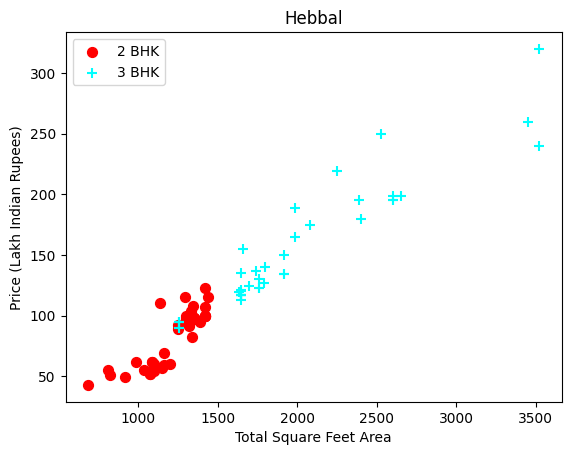

In [24]:
plot_scatter_chart(d6,"Hebbal")

Removing Bathroom Outliers

In [25]:
d6.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [26]:
d6[d6.bath>10]

,location,size,total_sqft,bath,price,bhk,Price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
5926,Other,10 BHK,12000.0,12.0,525.0,10,4375.000000
6015,Other,16 BHK,10000.0,16.0,550.0,16,5500.000000
6749,Other,11 BHK,6000.0,12.0,150.0,11,2500.000000
7080,Other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [27]:
d6[d6.bath>d6.bhk+2]

,location,size,total_sqft,bath,price,bhk,Price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
5851,Other,6 BHK,11338.0,9.0,1000.0,6,8819.897689
9017,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330


In [28]:
d7 = d6[d6.bath<d6.bhk+2]
d7.shape

(7239, 7)

In [29]:
d8 = d7.drop(['size','Price_per_sqft'],axis='columns')
d8.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


In [30]:
d8 = d8[[col for col in d8.columns if col != 'price'] + ['price']]

In [31]:
d8.to_csv(r'd8_dataset.csv', index=False)

## Creating a Model

In [32]:
d8

,location,total_sqft,bath,bhk,price
0,1st Block Jayanagar,2850.0,4.0,4,428.0
1,1st Block Jayanagar,1630.0,3.0,3,194.0
2,1st Block Jayanagar,1875.0,2.0,3,235.0
3,1st Block Jayanagar,1200.0,2.0,3,130.0
4,1st Block Jayanagar,1235.0,2.0,2,148.0
...,...,...,...,...,...
10231,Yeshwanthpur,1195.0,2.0,2,100.0
10232,Yeshwanthpur,1692.0,3.0,3,108.0
10234,Yeshwanthpur,2500.0,5.0,6,185.0
10239,Yeshwanthpur,1855.0,3.0,3,135.0


In [33]:
#d8 = d8.drop(d8[d8['location'] == 'Other'].index, axis=0)

In [34]:
len(d8.loc[d8['location']=='Other'])

1126

In [35]:
X = d8.iloc[:, :-1].values
y = d8.iloc[:, -1].values

In [36]:
print(X)

[['1st Block Jayanagar' 2850.0 4.0 4]
 ['1st Block Jayanagar' 1630.0 3.0 3]
 ['1st Block Jayanagar' 1875.0 2.0 3]
 ...
 ['Yeshwanthpur' 2500.0 5.0 6]
 ['Yeshwanthpur' 1855.0 3.0 3]
 ['Yeshwanthpur' 1876.0 3.0 3]]


In [37]:
print(y)

[428. 194. 235. ... 185. 135. 160.]


In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
X=ct.fit_transform(X).toarray()

In [39]:
print(X)

[[1.000e+00 0.000e+00 0.000e+00 ... 2.850e+03 4.000e+00 4.000e+00]
 [1.000e+00 0.000e+00 0.000e+00 ... 1.630e+03 3.000e+00 3.000e+00]
 [1.000e+00 0.000e+00 0.000e+00 ... 1.875e+03 2.000e+00 3.000e+00]
 ...
 [0.000e+00 0.000e+00 0.000e+00 ... 2.500e+03 5.000e+00 6.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 ... 1.855e+03 3.000e+00 3.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 ... 1.876e+03 3.000e+00 3.000e+00]]


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

### Multiple Linear Regression Model

In [41]:
X_train_1,X_test_1,y_train_1,y_test_1 = X_train, X_test, y_train, y_test

In [42]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_1,y_train_1)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [43]:
y_pred_1 = regressor.predict(X_test_1)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_1.reshape(len(y_pred_1),1),y_test.reshape(len(y_test_1),1)),1))

[[ 47.13  46.17]
 [123.84 115.  ]
 [ 76.93  54.  ]
 ...
 [ 58.63  65.12]
 [ 75.68  85.  ]
 [135.64 120.  ]]


In [44]:
import pandas as pd
new_data = pd.DataFrame([['Whitefield',1750, 3, 3]], columns=d8.columns[:4])
transformed_data = ct.transform(new_data)
print(regressor.predict(transformed_data))

[115.34]


/Users/sudhanvabp/Desktop/Real_estate_prediction-main/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(


In [45]:
from sklearn.metrics import r2_score
r2_score(y_test_1,y_pred_1)

0.8697077447864872

In [46]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.86, 0.84, 0.8 , 0.84, 0.87])

In [47]:
import pickle
with open('banglore_home_prices_model.pkl','wb') as f:
    pickle.dump(regressor,f)

In [48]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
location_encoded = encoder.fit_transform(d8[['location']])

In [49]:
import pickle

# Save the encoder
with open('location_encoder.pkl', 'wb') as f:
    pickle.dump(encoder,f)

In [50]:
import json
# Assuming 'df' is your original Pandas DataFrame
# before converting to a NumPy array:
# X = df.values  # This converts the DataFrame to a NumPy array

# Now, to get the column names, use df.columns:
columns = {
    'data_columns' : [col.lower() for col in d8.columns]
}

with open("columns.json","w") as f:
    f.write(json.dumps(columns))